In [1]:
import pandas as pd
import numpy as np 
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import os

iris=datasets.load_iris()


In [2]:
os.chdir('/Users/Harsha/Desktop/')
print(os.getcwd())

/Users/Harsha/Desktop


# Importing the Dataset

In [3]:
data=pd.read_csv("iris.csv")

# Viewing the Data

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica



# Checking for Null values

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA of Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

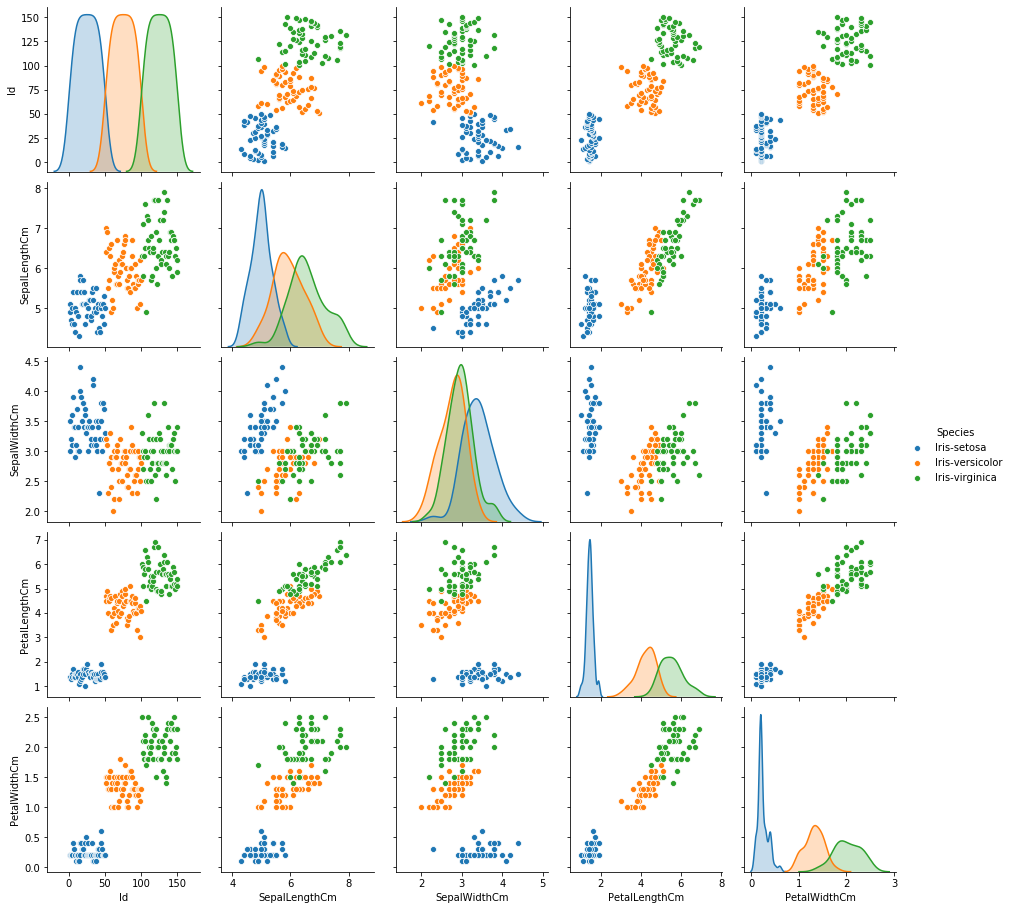

In [7]:
sb.pairplot(data.dropna(),hue="Species")

# Sepal length VS Width

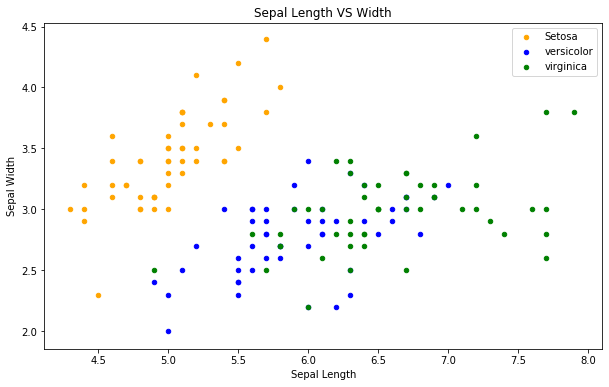

In [8]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


# Petal Length VS Width

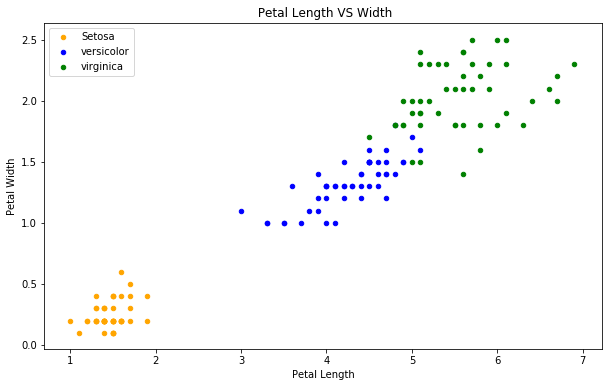

In [9]:
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Seeing how the length and width varies with different categories

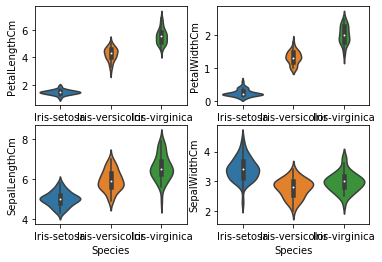

In [10]:
plt.subplot(2,2,1)
sb.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sb.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sb.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sb.violinplot(x='Species',y='SepalWidthCm',data=data)

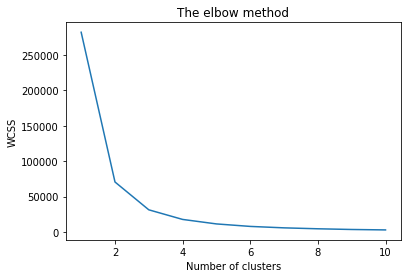

In [11]:

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From this we choose the number of clusters as ** '3**'.

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

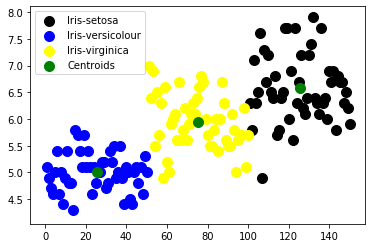

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

# Splitting the data into two parts (i.e., Train(70%) and Test(30%) )

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [15]:
train, test = train_test_split(data, test_size = 0.3)

In [16]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

In [17]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
127,6.1,3.0,4.9,1.8
124,6.7,3.3,5.7,2.1
26,5.0,3.4,1.6,0.4
118,7.7,2.6,6.9,2.3
54,6.5,2.8,4.6,1.5


In [18]:
train_y.head()

127     Iris-virginica
124     Iris-virginica
26         Iris-setosa
118     Iris-virginica
54     Iris-versicolor
Name: Species, dtype: object

In [19]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
129,7.2,3.0,5.8,1.6
100,6.3,3.3,6.0,2.5
113,5.7,2.5,5.0,2.0
97,6.2,2.9,4.3,1.3


In [20]:
test_y.head()

148     Iris-virginica
129     Iris-virginica
100     Iris-virginica
113     Iris-virginica
97     Iris-versicolor
Name: Species, dtype: object

In [21]:
from lazypredict.Supervised import LazyClassifier


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You c

In [22]:
all = LazyClassifier(ignore_warnings= True)

In [23]:
model,preds = all.fit(train_X, test_X, train_y, test_y)

100%|██████████| 30/30 [00:00<00:00, 45.73it/s]


In [24]:
model

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.96,0.95,None,0.96,0.01
LinearDiscriminantAnalysis,0.93,0.94,None,0.93,0.01
LogisticRegression,0.91,0.93,None,0.91,0.01
ExtraTreesClassifier,0.91,0.93,None,0.91,0.10
GaussianNB,0.91,0.93,None,0.91,0.01
NuSVC,0.91,0.93,None,0.91,0.01
AdaBoostClassifier,0.93,0.93,None,0.93,0.09
KNeighborsClassifier,0.91,0.92,None,0.91,0.01
XGBClassifier,0.89,0.91,None,0.89,0.03


##### Building Guassian Naive Based Model

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb = GaussianNB()
nb.fit(train_X,train_y)
pred = nb.predict(test_X)

In [27]:
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [28]:
print('The accuracy of the naive based classifier is',metrics.accuracy_score(pred,test_y))

The accuracy of the naive based classifier is 0.9111111111111111


##### Building DecisionTree classifier model 

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(train_X,train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

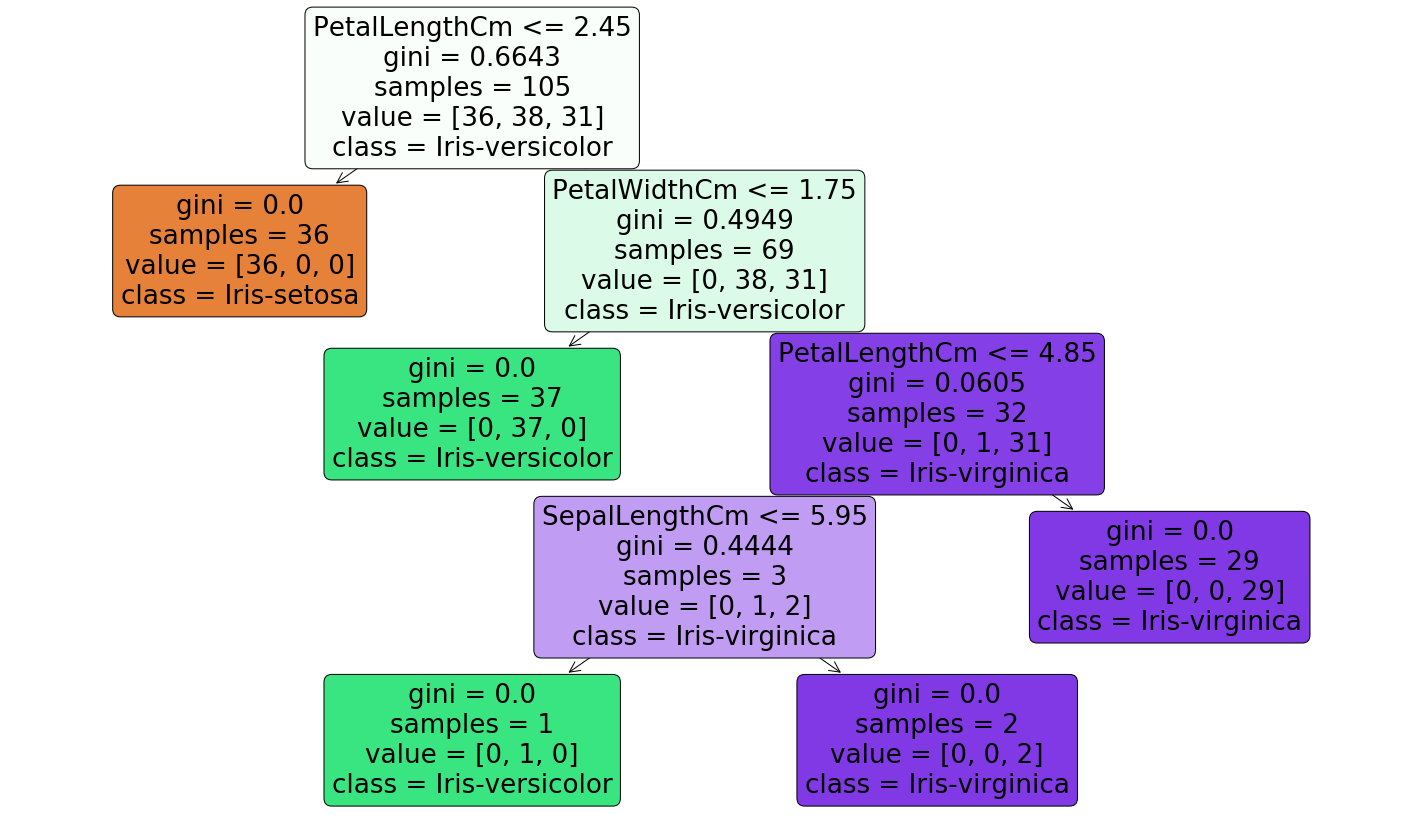

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


X1=data.iloc[:,1:5]
f_name=X1.columns.tolist()
col_name=data['Species'].unique().tolist()
plt.figure(figsize=(25,15))
tree_image = plot_tree(dtree,feature_names=f_name,class_names=col_name,max_depth=5,precision=4,label="all",filled=True,rounded=True)
plt.savefig('tree_image')

In [31]:
import pickle

In [34]:
pickle.dump(dtree, open('dtreemodel.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('dtreemodel.pkl','rb'))
print(model.predict([[4.4,3.0,1.3,0.2]]))


['Iris-setosa']


In [33]:
print(model.predict([[5.5,2.3,4.0,1.3]]))



['Iris-versicolor']
